## *Análisis del Dataset de insuficiencia cardiaca* heart_failure_clinical_records_dataset.csv de Kaggle

### **Presentado por:**

Angélica Órtiz Álvarez (aortiz016@soyudemedellin.edu.co)

Jhon Jader Diaz Gomez (jdiaz510@soyudemedellin.edu.co)

Cristian Camilo Ospina Metaute (cospina149@soyudemedellin.edu.co)

## Se importan las librerías requeridas para manipulación de datos y manejo de medelos

In [383]:
import numpy as np 
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

## Se carga el dataset heart_failure_clinical_records_dataset.csv de [Kaggle](https://www.kaggle.com/code/arjunamla02/logistic-regession-vs-decision-tree-vs-rf/notebook) - [UCI Irvine](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)


In [334]:
# Se carga de dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()   

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## 🧾 Descripción del Dataset

**Nombre del dataset:** `heart-failure-clinical-data`  
**Fuente:** Kaggle  
**Tipo de problema:** Clasificación binaria  
**Licencia:** Apache 2.0

### 🔍 Variables incluidas:
El dataset contiene variables clínicas relevantes para pacientes con insuficiencia cardíaca. Algunas de las variables clave incluyen:

- `age`: Edad del paciente
- `anaemia`: Presencia de anemia (booleano)
- `creatinine_phosphokinase`: Nivel de la enzima CPK
- `diabetes`: Diagnóstico de diabetes (booleano)
- `ejection_fraction`: Porcentaje de sangre expulsada por el corazón
- `high_blood_pressure`: Presión arterial alta (booleano)
- `platelets`: Recuento de plaquetas
- `serum_creatinine`: Nivel de creatinina en sangre
- `serum_sodium`: Nivel de sodio en sangre
- `sex`: Sexo del paciente
- `smoking`: Fumador (booleano)
- `time`: Tiempo de seguimiento en días
- `DEATH_EVENT`: Variable objetivo (0 = sobrevivió, 1 = falleció)

## 🎯 Objetivo del Estudio

El propósito principal del notebook es comparar el rendimiento de dos modelos de clasificación ampliamente utilizados en la industria:

1. **Regresión Logística**
3. **Bosque Aleatorio (Random Forest)**

### Objetivos específicos:

- Evaluar la capacidad predictiva de cada modelo sobre la variable `DEATH_EVENT`.
- Analizar las ventajas y desventajas de cada enfoque en términos de:
  - Interpretabilidad
  - Precisión
  - Curvas ROC y PR
  - Robustez frente al sobreajuste

## 📈 Aplicaciones del análisis

Este tipo de estudio es útil para:

- Profesionales de la salud que buscan herramientas predictivas para evaluar riesgos clínicos.
- Científicos de datos que desean entender el comportamiento de distintos algoritmos de clasificación en contextos médicos.
- Estudiantes y desarrolladores que exploran técnicas de machine learning aplicadas a datos reales.


## 🧬 Estructura del Dataset `heart-failure-clinical-data`

Este dataset contiene información clínica de pacientes con insuficiencia cardíaca. La tabla siguiente describe cada columna, su tipo de dato y su significado clínico:

| Columna                    | Tipo de dato | Descripción                                                                 |
|----------------------------|--------------|------------------------------------------------------------------------------|
| `age`                      | Numérico     | Edad del paciente en años.                                                  |
| `anaemia`                  | Binario      | Disminución de glóbulos rojos o hemoglobina (1 = sí, 0 = no).               |
| `creatinine_phosphokinase`| Numérico     | Nivel de la enzima CPK en sangre (mcg/L).                                   |
| `diabetes`                 | Binario      | Indica si el paciente tiene diabetes (1 = sí, 0 = no).                      |
| `ejection_fraction`        | Numérico     | Porcentaje de sangre expulsada por el corazón en cada contracción.         |
| `high_blood_pressure`      | Binario      | Indica si el paciente tiene hipertensión (1 = sí, 0 = no).                  |
| `platelets`                | Numérico     | Número de plaquetas en sangre (kiloplaquetas/mL).                           |
| `serum_creatinine`         | Numérico     | Nivel de creatinina en sangre (mg/dL).                                      |
| `serum_sodium`             | Numérico     | Nivel de sodio en sangre (mEq/L).                                           |
| `sex`                      | Binario      | Sexo del paciente (1 = masculino, 0 = femenino).                            |
| `smoking`                  | Binario      | Indica si el paciente fuma (1 = sí, 0 = no).                                |
| `time`                     | Numérico     | Tiempo de seguimiento del paciente (en días).                               |
| `DEATH_EVENT`              | Binario      | Variable objetivo: indica si el paciente falleció durante el seguimiento.  |


### Debido a que la base de datos original tiene solo 299 registros, se simula 2700 adicionales para completar 3000, de manera que tengamos una base de datos con suficientes datos y con ruido para hacer el ejercicio de manipulación de datos.

In [336]:
# Definición de las columnas y sus tipos de datos esperados
# Basado en la estructura del dataset "heart_failure_clinical_records_dataset"
columns = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
    'DEATH_EVENT'
]

# Rango de valores (aproximados, basados en el dataset original) para la generación sintética
data_ranges = {
    'age': (40, 95),
    'anaemia': (0, 1), # Binario
    'creatinine_phosphokinase': (23, 7861), # Valor alto para simular la dispersión
    'diabetes': (0, 1), # Binario
    'ejection_fraction': (14, 80),
    'high_blood_pressure': (0, 1), # Binario
    'platelets': (100000, 850000), # Rango amplio
    'serum_creatinine': (0.5, 9.4),
    'serum_sodium': (113, 148),
    'sex': (0, 1), # Binario (Mujer=0, Hombre=1 o viceversa, solo necesitamos el binario)
    'smoking': (0, 1), # Binario
    'time': (4, 285),
    'DEATH_EVENT': (0, 1) # Binario (Target)
}

# --- 1. Simulación de los 299 Registros Originales (Base) ---
# Creamos un DataFrame base de 299 filas con datos limpios y aleatorios dentro del rango,
# para simular la parte original del dataset.

np.random.seed(42) # Para reproducibilidad

base_records = 299
data_base = {}

# Generar datos limpios para la base
for col in columns:
    min_val, max_val = data_ranges[col]

    if col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'time']:
        data_base[col] = np.random.randint(min_val, max_val + 1, base_records)
    elif col in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']:
        data_base[col] = np.random.randint(min_val, max_val + 1, base_records)
    elif col in ['platelets']:
        # Simular números grandes, a veces con decimales como en el dataset original
        data_base[col] = np.round(np.random.uniform(min_val, max_val, base_records), 2)
    elif col in ['serum_creatinine', 'serum_sodium']:
        data_base[col] = np.round(np.random.uniform(min_val, max_val, base_records), 2)

df_base = pd.DataFrame(data_base)

# Asegurar que las columnas binarias y enteras sean de tipo entero en la base
int_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
            'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking',
            'time', 'DEATH_EVENT']
for col in int_cols:
    df_base[col] = df_base[col].astype(int)


# --- 2. y 3. Generación de 2701 Registros Sintéticos con Errores ---

new_records = 3000 - base_records
data_new = {}

# Generar datos base para los nuevos registros
for col in columns:
    min_val, max_val = data_ranges[col]

    if col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'time']:
        data_new[col] = np.random.randint(min_val, max_val + 1, new_records)
    elif col in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']:
        data_new[col] = np.random.randint(min_val, max_val + 1, new_records)
    elif col in ['platelets']:
        data_new[col] = np.round(np.random.uniform(min_val, max_val, new_records), 2)
    elif col in ['serum_creatinine', 'serum_sodium']:
        data_new[col] = np.round(np.random.uniform(min_val, max_val, new_records), 2)

df_new = pd.DataFrame(data_new)


### INTRODUCCIÓN DE AJUSTES Y ERRORES (Nulos y Tipos de Datos) ###

# 1. VALORES NULOS (NaN)
# Se introduce NaN en aproximadamente el 5% al 15% de los nuevos registros para algunas columnas
np.random.seed(43) # Nueva semilla para la introducción de errores

# Columnas seleccionadas para nulos (mezclando tipos)
null_cols = ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'DEATH_EVENT']

for col in null_cols:
    nan_count = int(new_records * random.uniform(0.05, 0.15))
    nan_indices = np.random.choice(df_new.index, nan_count, replace=False)
    df_new.loc[nan_indices, col] = np.nan

# 2. CAMBIOS EN EL TIPO DE DATO (para forzar conversión o limpieza)

# a) Conversión de Binarias/Enteras a Texto (String) o Nombres
# La columna 'sex' (0 o 1) se convierte a 'MALE'/'FEMALE' en algunos registros para requerir mapeo
string_conversion_count = int(new_records * 0.10)
string_indices = np.random.choice(df_new.index, string_conversion_count, replace=False)

for i in string_indices:
    # Si es 1, conviértelo a 'Male', si es 0, conviértelo a 'Female'.
    # Usamos una mezcla de 'Male'/'male' para simular inconsistencias
    if df_new.loc[i, 'sex'] == 1:
        df_new.loc[i, 'sex'] = random.choice(['MALE', 'male'])
    else:
        df_new.loc[i, 'sex'] = random.choice(['FEMALE', 'female'])

# b) Conversión de Decimales a Texto con caracteres no numéricos
# La columna 'serum_creatinine' se convierte a string con un símbolo/unidad en algunos casos
string_unit_count = int(new_records * 0.08)
string_unit_indices = np.random.choice(df_new.index, string_unit_count, replace=False)

for i in string_unit_indices:
    original_value = df_new.loc[i, 'serum_creatinine']
    if not pd.isna(original_value): # No modificar si ya es NaN
        df_new.loc[i, 'serum_creatinine'] = f"{original_value:.2f} mg/dL"
    else:
        df_new.loc[i, 'serum_creatinine'] = 'Desconocido' # Otro valor no numérico

# c) Valores inconsistentes para booleanas/binarias
# La columna 'diabetes' (0 o 1) se convierte a 'YES'/'NO'/'N/A'/'2' en algunos registros
inconsistent_count = int(new_records * 0.12)
inconsistent_indices = np.random.choice(df_new.index, inconsistent_count, replace=False)

for i in inconsistent_indices:
    if df_new.loc[i, 'diabetes'] == 1:
        df_new.loc[i, 'diabetes'] = random.choice(['YES', 2]) # Mezcla de string y otro entero
    else:
        df_new.loc[i, 'diabetes'] = random.choice(['NO', 'N/A', 0]) # Mezcla de string y valor correcto

# d) Valores extremos no válidos o placeholders
# En 'ejection_fraction' (debería ser 14-80%), se introducen valores como -1 o 999
extreme_count = int(new_records * 0.04)
extreme_indices = np.random.choice(df_new.index, extreme_count, replace=False)
for i in extreme_indices:
    df_new.loc[i, 'ejection_fraction'] = random.choice([-1, 999])

# --- 4. Combinar y Guardar ---

# Concatenar la base (limpia) y los nuevos registros (con errores)
df_final = pd.concat([df_base, df_new], ignore_index=True)

# Reordenar las columnas para asegurar el formato original
df_final = df_final[columns]

# Guardar el DataFrame final en un archivo CSV
output_filename = 'heart_failure_clinical_records_extended.csv'
df_final.to_csv(output_filename, index=False)

print(f"Base de datos generada: {output_filename}")
print(f"Total de registros: {len(df_final)}")
print(f"Registros originales (simulados): {len(df_base)}")
print(f"Registros nuevos (con errores): {len(df_new)}")

# Muestra de las primeras filas con los errores introducidos
print("\nPrimeras filas del CSV final:")
print(df_final.head(30))
print("\nÚltimas filas del CSV final (donde se concentran los errores):")
print(df_final.tail(30))

df = df_final.copy()

Base de datos generada: heart_failure_clinical_records_extended.csv
Total de registros: 3000
Registros originales (simulados): 299
Registros nuevos (con errores): 2701

Primeras filas del CSV final:
     age  anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0   78.0        0                    1702.0        0                 51   
1   91.0        0                    3529.0        0                 28   
2   68.0        1                    5115.0        1                 77   
3   54.0        0                    7276.0        1                 41   
4   82.0        0                    2767.0        1                 52   
5   47.0        1                    3379.0        1                 70   
6   60.0        1                    4068.0        1                 30   
7   78.0        0                    1266.0        1                 57   
8   58.0        0                    5211.0        1                 38   
9   62.0        1                    3141.0        

C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:106: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'male' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[i, 'sex'] = random.choice(['MALE', 'male'])
C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.24 mg/dL' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_new.loc[i, 'serum_creatinine'] = f"{original_value:.2f} mg/dL"
C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\492679449.py:129: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int32, please explicitly cast to a compatible dtype first

## 🔎 Exploración Rápida de Datos (EDA)

Este bloque de código realiza un análisis exploratorio inicial sobre un DataFrame `df`, con el objetivo de comprender su estructura, calidad de datos y detectar la variable objetivo para tareas de clasificación o regresión.

### 🧩 1. Información general del dataset
- **`df.shape`**: Muestra el número de filas y columnas del dataset.
- **`df.columns.tolist()`**: Lista los nombres de las columnas presentes.
- **`df.info()`**: Proporciona información sobre el tipo de datos de cada columna, cantidad de valores no nulos y uso de memoria.

### 📊 2. Estadísticas descriptivas

- Se genera un resumen estadístico de las columnas numéricas: media, desviación estándar, valores mínimos, máximos y percentiles.
- La transposición (`.T`) permite visualizar las estadísticas en formato vertical, facilitando la lectura.

### 🧼 3. Detección de valores nulos

- Se calcula el número de valores nulos por columna para evaluar la calidad del dataset y decidir si es necesario imputar o eliminar datos.

### 🎯 4. Identificación de la variable objetivo

- Se busca automáticamente una columna llamada `target` o `label`, que comúnmente representa la variable objetivo.
- Si no se encuentra, se asume que la última columna podría ser la etiqueta.

### 📈 5. Distribución de la variable objetivo

- Se muestra la distribución de clases en la variable objetivo, útil para detectar desbalance de clases.
- Si no se detecta una columna explícita como `target` o `label`, se analiza la última columna como posible candidata.

In [337]:
print("Shape:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nInfo:")
display(df.info())

print("\nDescripción numérica:")
display(df.describe().T)

Shape: (3000, 13)

Columnas: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2840 non-null   float64
 1   anaemia                   3000 non-null   int64  
 2   creatinine_phosphokinase  2786 non-null   float64
 3   diabetes                  3000 non-null   object 
 4   ejection_fraction         3000 non-null   int64  
 5   high_blood_pressure       3000 non-null   int64  
 6   platelets                 2686 non-null   float64
 7   serum_creatinine          2845 non-null   object 
 8   serum_sodium              3000 non-null   float64
 9   sex                       3000 non-null   object 
 10 

None


Descripción numérica:


,count,mean,std,min,25%,50%,75%,max
age,2840.0,67.661620,16.216654,40.00,54.0000,67.000,82.0000,95.00
anaemia,3000.0,0.505000,0.500058,0.00,0.0000,1.000,1.0000,1.00
creatinine_phosphokinase,2786.0,3861.659727,2242.393516,25.00,1856.2500,3793.500,5754.7500,7856.00
ejection_fraction,3000.0,60.247333,117.576921,-1.00,30.0000,47.000,64.0000,999.00
high_blood_pressure,3000.0,0.493333,0.500039,0.00,0.0000,0.000,1.0000,1.00
platelets,2686.0,474664.174926,218736.291022,100902.71,278418.3325,470766.435,670618.8675,849853.86
serum_sodium,3000.0,130.770633,10.069369,113.02,122.2475,130.735,139.4225,148.00
smoking,3000.0,0.480333,0.499696,0.00,0.0000,0.000,1.0000,1.00
time,3000.0,141.505667,81.531060,4.00,71.7500,137.000,214.0000,285.00
DEATH_EVENT,2796.0,0.489628,0.499982,0.00,0.0000,0.000,1.0000,1.00


In [338]:
# Tipos, nulos, valores únicos
print("Tipos de datos:")
display(df.dtypes)
print("\nValores nulos por columna:")
display(df.isnull().sum())
print("\nConteos únicos por columna (hasta 10 mostrados):")
display(df.nunique().sort_values(ascending=False).head(20))

# Asegurar que la columna target está presente y es entera
target_col = "DEATH_EVENT"
if target_col not in df.columns:
    raise KeyError(f"No se encontró la columna objetivo '{target_col}' en el dataset.")
df[target_col] = pd.to_numeric(df[target_col], errors="coerce").astype("Int64")
print(f"\nDistribución de {target_col}:")
display(df[target_col].value_counts(dropna=False))

# Corregir posibles columnas numéricas mal tipadas (por ejemplo ages con float)
for c in df.columns:
    if df[c].dtype == "float64" and df[c].dropna().apply(float.is_integer).all():
        # si son floats que representan enteros, convertir a int
        df[c] = df[c].astype("Int64")

Tipos de datos:


age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                     object
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine             object
serum_sodium                float64
sex                          object
smoking                       int64
time                          int64
DEATH_EVENT                 float64
dtype: object


Valores nulos por columna:


age                         160
anaemia                       0
creatinine_phosphokinase    214
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   314
serum_creatinine            155
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                 204
dtype: int64


Conteos únicos por columna (hasta 10 mostrados):


platelets                   2686
creatinine_phosphokinase    2323
serum_sodium                1993
serum_creatinine            1030
time                         282
ejection_fraction             69
age                           56
sex                            6
diabetes                       6
anaemia                        2
high_blood_pressure            2
smoking                        2
DEATH_EVENT                    2
dtype: int64


Distribución de DEATH_EVENT:


DEATH_EVENT
0       1427
1       1369
<NA>     204
Name: count, dtype: Int64

### Después de hacer esta exploración inicial identificamos que hay 13 columnas y 3000 registros. Asimismo, se encuentra que las columnas age, creatinine, platelets, serum_cretinine y Death_event tienen nulos. Y los tipos de datos son númericos y objetos

### Seguidamente, se identifica que de las 13 columnas existentes, hay 6 columnas booleanas que indican si se da o no esa situación. 
"diabetes", "anaemia", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"

## Preprocesamiento inicial de datos

### Se eliminan los registros nulos de la variable objetivo (Death_event) debido a que ese valor es relevante para la predicción

In [339]:
df.dropna(subset=['DEATH_EVENT'], inplace=True)
print("\nValores nulos por columna:")
display(df.isnull().sum())


Valores nulos por columna:


age                         144
anaemia                       0
creatinine_phosphokinase    198
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   295
serum_creatinine            147
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [340]:
# Reemplaza la celda incompleta por el siguiente código:
for col in df.columns:
    print(f"\n=== Columna: {col} ===")
    # Tipos por elemento
    tipos = df[col].apply(type).value_counts()
    print("Tipos por elemento:")
    print(tipos.to_dict())



=== Columna: age ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: anaemia ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: creatinine_phosphokinase ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: diabetes ===
Tipos por elemento:
{<class 'int'>: 2632, <class 'str'>: 164}

=== Columna: ejection_fraction ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: high_blood_pressure ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: platelets ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_creatinine ===
Tipos por elemento:
{<class 'float'>: 2597, <class 'str'>: 199}

=== Columna: serum_sodium ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: sex ===
Tipos por elemento:
{<class 'int'>: 2552, <class 'str'>: 244}

=== Columna: smoking ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: time ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: DEATH_EVENT ===
Tipos por elemento:
{<class 'int'>: 279

### De la revisión anterior, se identifica que serum_creatinine, sex, diabetes tienen valores que son string, cuando se espera que sean todos numéricos

### Se hace un procesamiento especial para estas columnas

### Para Serum_creatinine:

In [341]:
# Identificar cuales son los datos str que tiene la columna serum_creatinine 
strings_serum_creatinine = df['serum_creatinine'][df['serum_creatinine'].apply(lambda x: isinstance(x, str))]
strings_serum_creatinine

301      6.44 mg/dL
327      8.22 mg/dL
360      4.46 mg/dL
370     Desconocido
372      4.40 mg/dL
           ...     
2956     1.43 mg/dL
2978     1.63 mg/dL
2979     5.00 mg/dL
2984     6.83 mg/dL
2998     9.13 mg/dL
Name: serum_creatinine, Length: 199, dtype: object

In [342]:
# Función de limpieza: extrae el número si existe, convierte 'Desconocido' a NaN
def clean_serum_creatinine(v):
    if pd.isna(v):
        return np.nan
    if isinstance(v, str):
        s = v.strip()
        if s.lower() == 'desconocido':
            return np.nan
        s = s.replace(',', '.')
        m = re.search(r'[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?', s)
        return float(m.group()) if m else np.nan
    try:
        return float(v)
    except Exception:
        return np.nan

# Aplicar limpieza y asegurar tipo numérico
df['serum_creatinine'] = df['serum_creatinine'].apply(clean_serum_creatinine)
df['serum_creatinine'] = pd.to_numeric(df['serum_creatinine'], errors='coerce')

# Resumen post-limpieza
print("\nResumen post-limpieza serum_creatinine:")
print(df['serum_creatinine'].describe())
print("Nulos en serum_creatinine:", df['serum_creatinine'].isna().sum())


Resumen post-limpieza serum_creatinine:
count    2637.000000
mean        5.004494
std         2.542980
min         0.500000
25%         2.820000
50%         5.080000
75%         7.140000
max         9.400000
Name: serum_creatinine, dtype: float64
Nulos en serum_creatinine: 159


### Para Sex:

In [343]:
# Identificar cuales son los datos str que tiene la columna serum_creatinine 
strings_sex = df['sex'][df['sex'].apply(lambda x: isinstance(x, str))]
strings_sex

300     FEMALE
336       MALE
339       MALE
349       male
351       male
         ...  
2946    female
2949    FEMALE
2969    female
2973    FEMALE
2994    FEMALE
Name: sex, Length: 244, dtype: object

In [344]:
df['sex'].unique()

array([1, 0, 'FEMALE', 'MALE', 'male', 'female'], dtype=object)

In [345]:
# Función para normalizar 'sex': male -> 0, female -> 1. Otros valores -> NA
def clean_sex(v):
    if isinstance(v, str):
        s = v.lower()
        if s in ('male'):
            return 1
        if s in ('female'):
            return 0
    else:
        return v
# Aplicar limpieza y convertir a entero nullable
df['sex'] = df['sex'].apply(clean_sex)

# Resumen posterior
print("\nConteos en 'sex' después de la limpieza (incluye NA):")
display(df['sex'].value_counts(dropna=False))



Conteos en 'sex' después de la limpieza (incluye NA):


sex
1    1422
0    1374
Name: count, dtype: int64

### Para diabetes: 

In [346]:
df['diabetes'].unique()

array([0, 1, 'YES', 'NO', 2, 'N/A'], dtype=object)

In [347]:
# Identificar cuales son los datos str que tiene la columna serum_creatinine 
strings_diabetes = df['diabetes'][df['diabetes'].apply(lambda x: isinstance(x, str))]
strings_diabetes

301     YES
313      NO
317     YES
331     YES
361     YES
       ... 
2916    N/A
2926    YES
2948    N/A
2962    YES
2998     NO
Name: diabetes, Length: 164, dtype: object

In [348]:
# Función para normalizar 'diabetes': Yes -> 1, No -> 0. Otros valores -> NA
def clean_diabetes(v):
    if isinstance(v, str):
        s = v.lower()
        if s in ('yes'):
            return 1
        if s in ('no'):
            return 0
        if s in ('n/a'):
            return np.nan
    elif v == 2:
        return np.nan
    else:
        return v
# Aplicar limpieza y convertir a entero nullable
df['diabetes'] = df['diabetes'].apply(clean_diabetes).astype('Int64')

# Resumen posterior
print("\nConteos en 'diabetes' después de la limpieza (incluye NA):")
display(df['diabetes'].value_counts(dropna=False))


Conteos en 'diabetes' después de la limpieza (incluye NA):


diabetes
0       1406
1       1261
<NA>     129
Name: count, dtype: Int64

In [349]:
# Reemplaza la celda incompleta por el siguiente código:
for col in df.columns:
    print(f"\n=== Columna: {col} ===")
    # Tipos por elemento
    tipos = df[col].apply(type).value_counts()
    print("Tipos por elemento:")
    print(tipos.to_dict())



=== Columna: age ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: anaemia ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: creatinine_phosphokinase ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: diabetes ===


Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: ejection_fraction ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: high_blood_pressure ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: platelets ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_creatinine ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: serum_sodium ===
Tipos por elemento:
{<class 'float'>: 2796}

=== Columna: sex ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: smoking ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: time ===
Tipos por elemento:
{<class 'int'>: 2796}

=== Columna: DEATH_EVENT ===
Tipos por elemento:
{<class 'int'>: 2796}


### Se valida que no hay valores tipo  string en las columnas numéricas

## Imputación y manejo de nulos

Debido al ruido que puede generar la imputación de las variables booleanas, se elimina los registros nulos de ellas

Por otro lado, para las variables flotantes, procedemos a hacer imputación según el tipo

In [350]:
# Se identifica que de las 13 columnas existentes, hay 6 columnas booleanas que indican si se da o no esa situación.
cols_to_bool = [
    "diabetes",
    "anaemia",
    "high_blood_pressure",
    "sex",
    "smoking",
    "DEATH_EVENT"
]

for c in cols_to_bool:
    df[c] = pd.to_numeric(df[c], errors="coerce").map({0: False, 1: True}).astype("boolean")


In [351]:
display(df.isnull().sum())

age                         144
anaemia                       0
creatinine_phosphokinase    198
diabetes                    129
ejection_fraction             0
high_blood_pressure           0
platelets                   295
serum_creatinine            159
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [352]:
df.dropna(subset= ['diabetes'], inplace=True)
print("\nValores nulos por columna:")
display(df.isnull().sum())


Valores nulos por columna:


age                         136
anaemia                       0
creatinine_phosphokinase    186
diabetes                      0
ejection_fraction             0
high_blood_pressure           0
platelets                   284
serum_creatinine            151
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2667 non-null   int64  
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(3), int64(2)
memory usage: 203.2 KB

### Con el fin de identificar la distribución de los datos, se realiza la siguiente gráfica

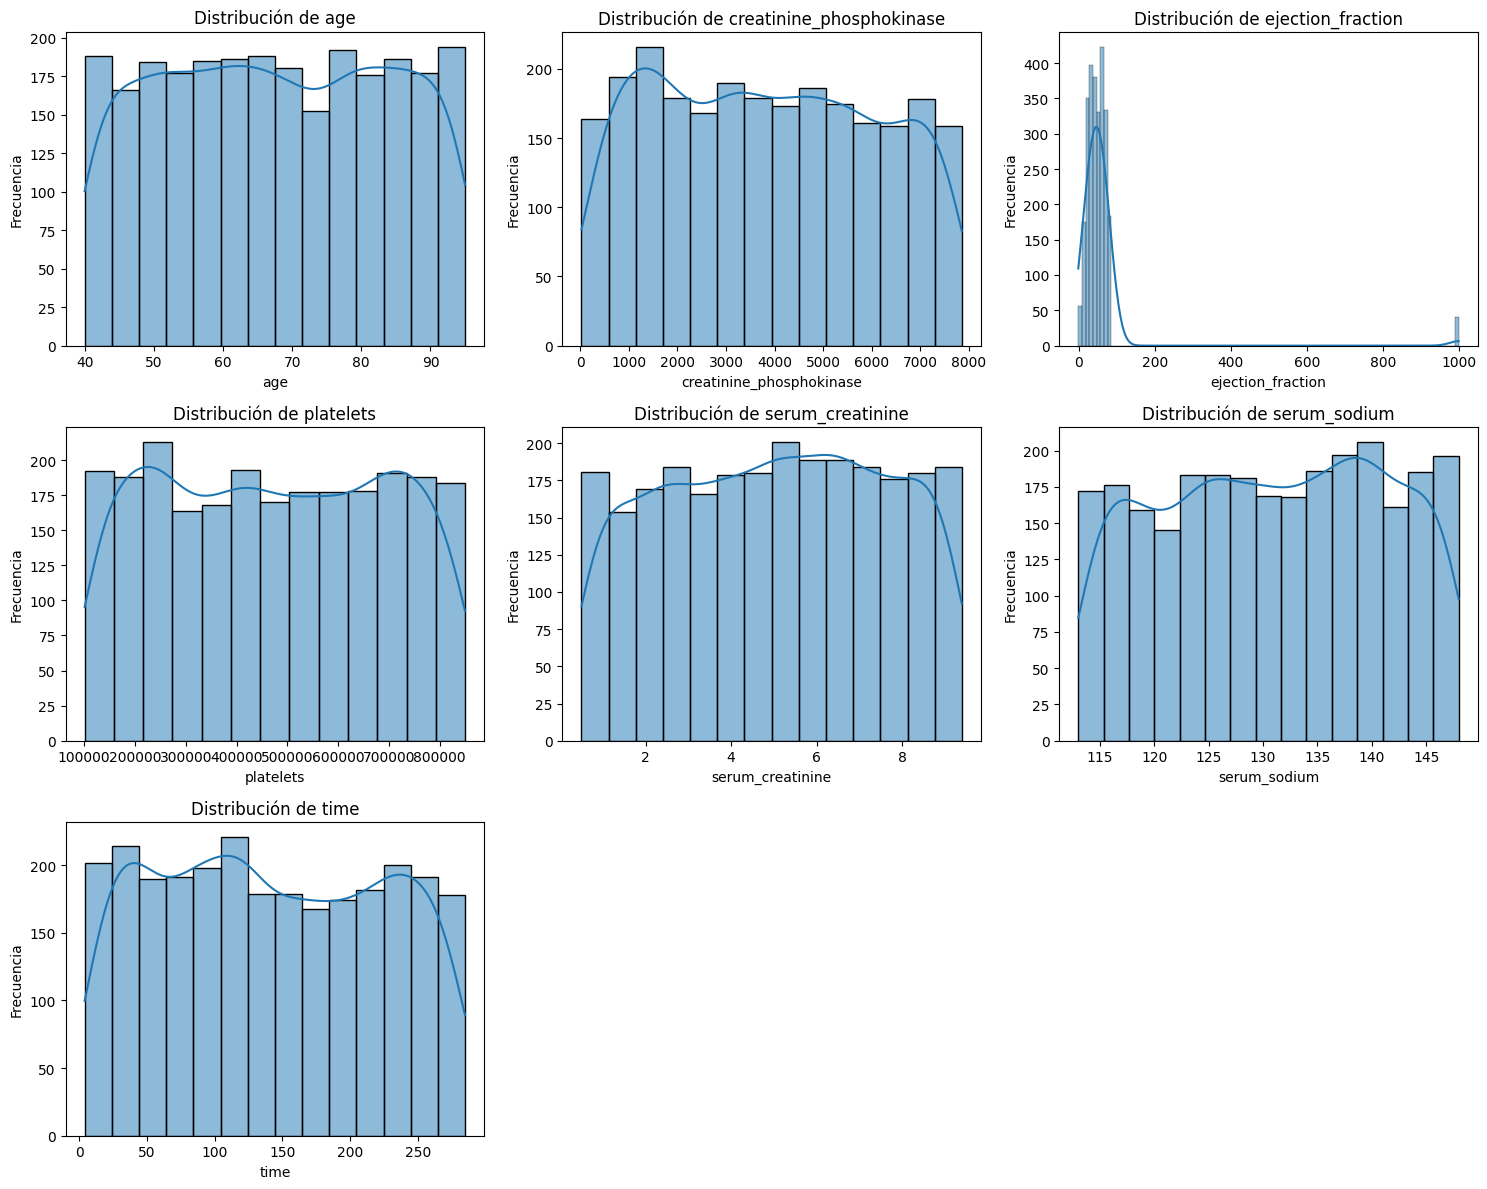

In [354]:
# Obtener columnas numéricas (excluyendo booleanas)
numeric_cols = df.select_dtypes(exclude=['boolean']).columns

# Calcular número de filas y columnas para el subplot
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Crear figura
plt.figure(figsize=(15, 4*n_rows))

# Crear subplots para cada variable
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Se observan datos atipicos en ejection fraction 

In [355]:
# Se elimina los valores atípicos en ejection_fraction
df['ejection_fraction'] = df['ejection_fraction'].apply(lambda x: np.nan if x < 0 or x > 200 else x)

## Se procede a guardar el dataframe procesado


In [356]:
df.to_csv('heart_failure_clinical_records_extended_cleaned.csv', index=False)

### Se realizan múltiples gráficas para entender los datos

In [357]:
bins = [39, 45, 50, 55, 60, 65, 70, 75, 80, 95]
labels = ["40-45", "46-50", "51-55", "56-60", "61-65", "66-70", "71-75", "76-80", "81-95"]

d2_ = df.copy()

d2_['age_group'] = pd.cut(d2_['age'], bins=bins, labels=labels, right=True)

d2_[['age', 'age_group']].head()

,age,age_group
0,78,76-80
1,91,81-95
2,68,66-70
3,54,51-55
4,82,81-95


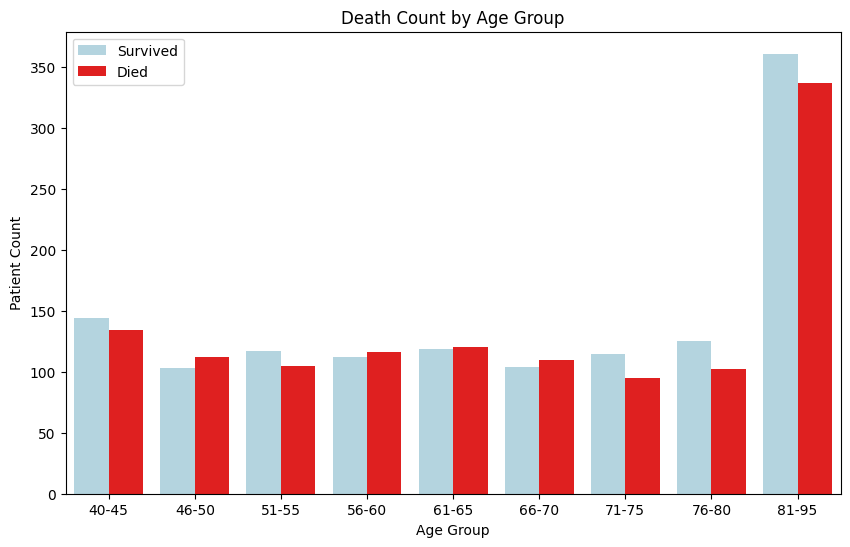

In [358]:
plt.figure(figsize=(10,6))
sns.countplot(data=d2_, x='age_group', hue='DEATH_EVENT', palette=["lightblue", "red"])
plt.title("Death Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Patient Count")
plt.legend(["Survived", "Died"])
plt.show()

La gráfica muestra que, aunque los grupos de edad intermedios (ej. 51–65) concentran el mayor número absoluto de pacientes sobrevivientes, la proporción de fallecidos aumenta claramente en los grupos de mayor edad; especialmente 71–75 y 81–95 presentan tasas de mortalidad notablemente más altas que los grupos jóvenes; esto sugiere una relación positiva entre edad y riesgo de muerte durante el seguimiento.

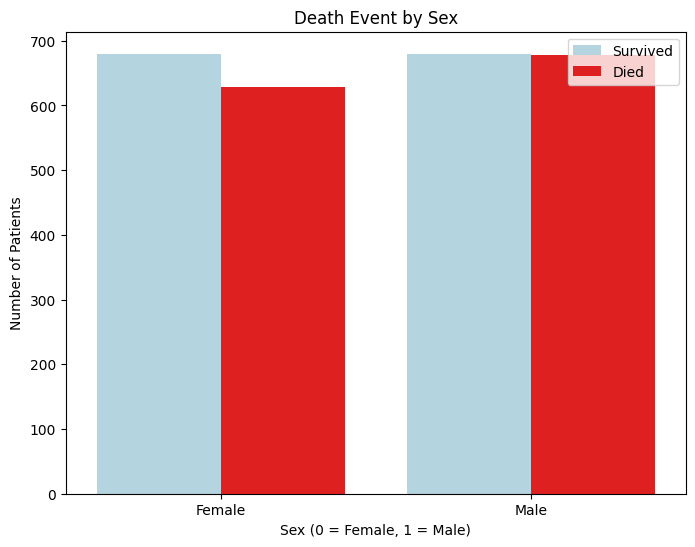

In [359]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sex', hue='DEATH_EVENT', palette=["lightblue", "red"])

plt.title("Death Event by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Number of Patients")
plt.legend(["Survived", "Died"])
plt.xticks([0, 1], ["Female", "Male"])
plt.show()

En la gráfica por sexo se observa que hay más pacientes hombres que mujeres y, en valores absolutos, también más muertes entre los hombres; no obstante, al mirar la proporción de fallecidos dentro de cada grupo la diferencia parece menos contundente y podría ser pequeña o nula —es decir, el mayor número de muertes en hombres puede deberse en parte al mayor tamaño de esa submuestra. 

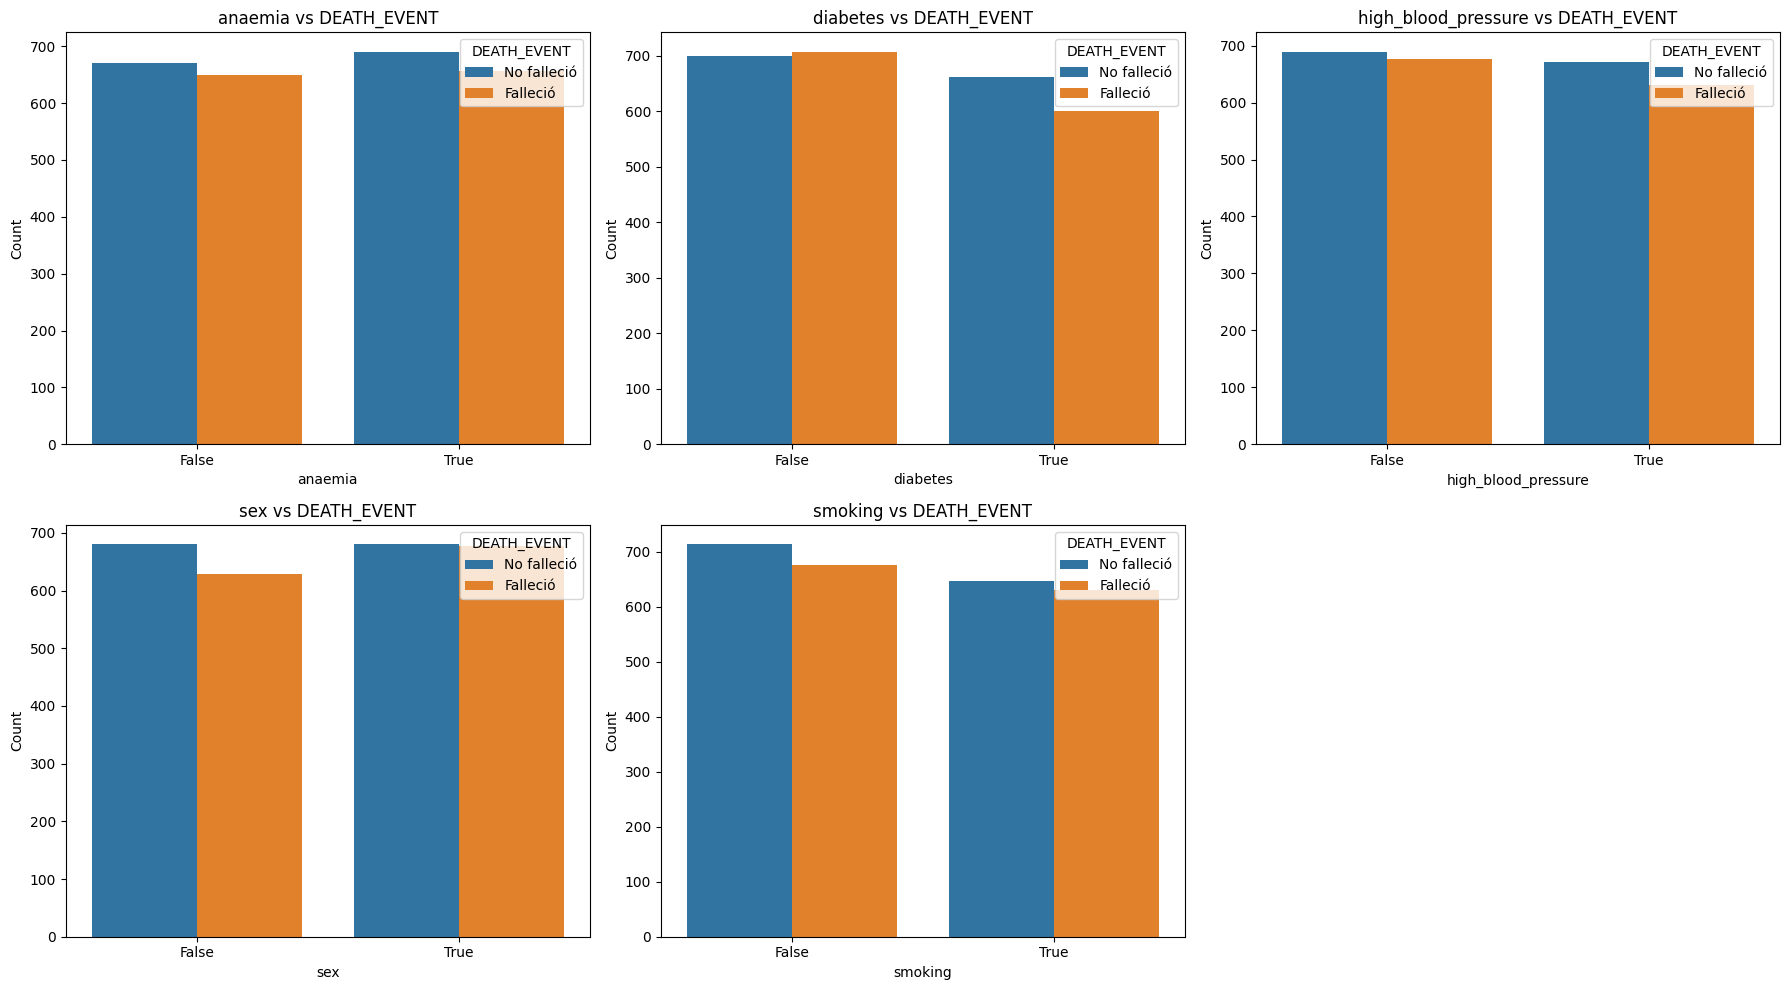

In [360]:
# Variables binarias que quieres comparar
binary_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Graficar cada variable
for i, var in enumerate(binary_vars):
    sns.countplot(data=df, x=var, hue='DEATH_EVENT', ax=axes[i])
    axes[i].set_title(f'{var} vs DEATH_EVENT')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='DEATH_EVENT', labels=['No falleció', 'Falleció'])

# Eliminar subplot vacío si hay uno
if len(binary_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Anaemia
Observación visual: la barra roja (fallecidos) relativa al total del grupo parece más alta en pacientes con anaemia (True) que en los que no tienen anaemia (False).
Interpretación: sugiere que la presencia de anemia está asociada a una mayor proporción de fallecimientos en el seguimiento. Clínicamente plausible: la anemia puede reflejar peor estado general o comorbilidades.
Señal: moderada-fuerte visualmente (la diferencia de proporción es notable).

Diabetes
Observación visual: también aquí la proporción de muertes parece mayor entre los diabéticos (True) que entre los no diabéticos.
Interpretación: indica una asociación positiva entre diabetes y mortalidad. Podría reflejar mayor carga de comorbilidad o peor pronóstico.
Señal: moderada; la diferencia es apreciable pero no tan grande como en algunos otros factores (según la gráfica).

High_blood_pressure (hipertensión)
Observación visual: se ve un mayor número absoluto de muertes en quienes tienen hipertensión (True) comparado con No, y la proporción de muertes dentro de «True» parece superior.
Interpretación: hipertensión podría asociarse a mayor riesgo, aunque en muchos estudios su efecto depende de control, edad y otros factores cardiovasculares.
Señal: moderada; comparable a diabetes/anaemia.

Sex (sexo)
Observación visual: hay muchos más hombres que mujeres en la muestra; en valores absolutos hay más muertes entre hombres (barra roja masculina mayor).
Interpretación: el mayor número de muertes en hombres podría deberse a (a) mayor tamaño de la submuestra masculina o (b) un riesgo real mayor en hombres. Visualmente, la proporción no parece tan distinta como los conteos absolutos; por tanto la diferencia puede ser en gran parte por el mayor número de hombres.
Señal: débil-moderada; necesita comparar proporciones (tasa de muerte por sexo) antes de concluir un efecto fuerte.

Smoking (tabaquismo)
Observación visual: los fumadores (True) muestran una proporción de fallecidos claramente mayor que los no fumadores.
Interpretación: tabaquismo asociado a mayor mortalidad, coherente con efectos sobre enfermedad cardiovascular y comorbilidades.
Señal: moderada-fuerte.

<Axes: >

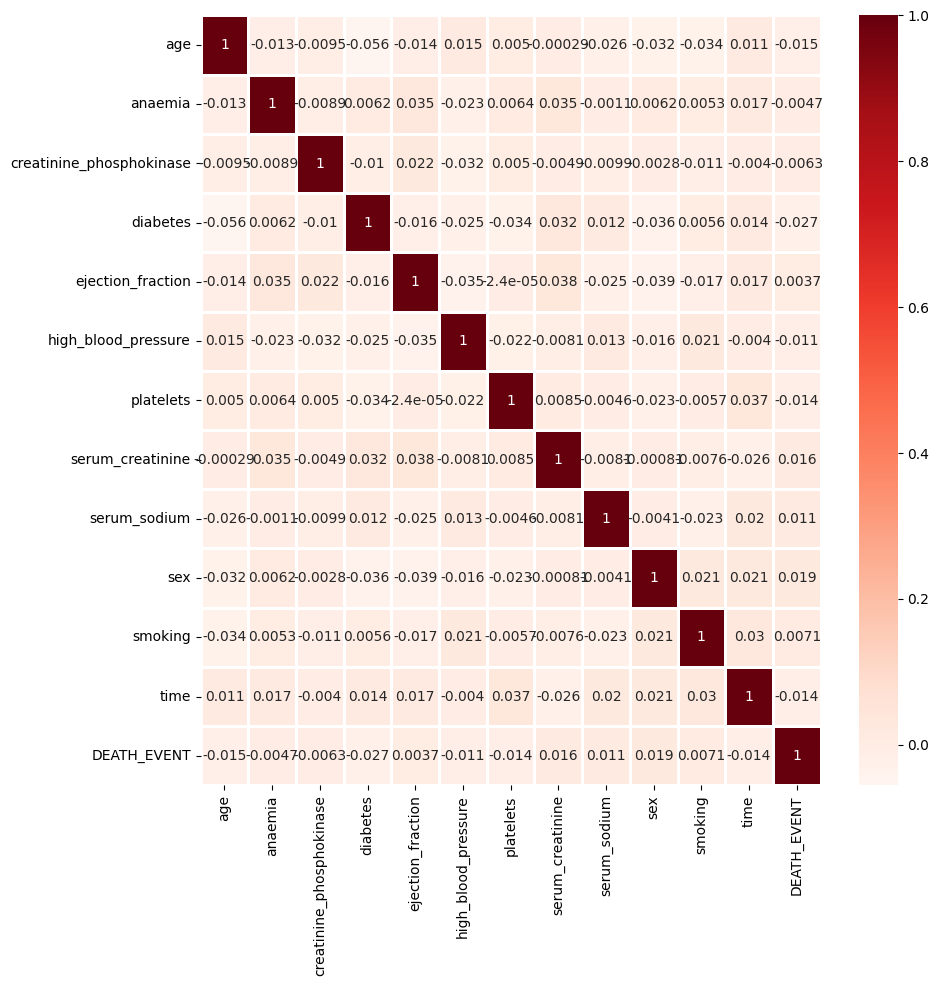

In [361]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Reds",annot=True,linewidth=1)

La matriz muestra que las variables más asociadas con la muerte son serum_creatinine (r ≈ +0.29) y age (r ≈ +0.25), mientras que ejection_fraction presenta una correlación negativa relevante (r ≈ −0.27): es decir, mayor creatinina y edad y menor fracción de eyección se asocian con mayor probabilidad de DEATH_EVENT. También destaca serum_sodium con correlación negativa moderada (≈ −0.20). Muchas de las variables binarias (anaemia, diabetes, hipertensión, smoking, sex) tienen correlaciones pequeñas con DEATH_EVENT en términos de Pearson, aunque visualmente algunas muestran señales; además sex y smoking están moderadamente correlacionadas entre sí (≈ +0.45).

### Preprocesamiento y modelado

In [362]:
# 1. Primero veamos los nulos antes de la transformación
df.info()
print("Nulos antes de la transformación:")
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2571 non-null   float64
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(4), int64(1)
memory usage: 203.2 KB

age                         136
anaemia                       0
creatinine_phosphokinase    186
diabetes                      0
ejection_fraction            96
high_blood_pressure           0
platelets                   284
serum_creatinine            151
serum_sodium                  0
sex                           0
smoking                       0
time                          0
DEATH_EVENT                   0
dtype: int64

# Diagnóstico inicial sin estandarizar y sin el pipeline

📊 Resultados - Regresión Logística
Accuracy: 0.5222
              precision    recall  f1-score   support

         0.0       0.52      0.77      0.62       196
         1.0       0.52      0.27      0.35       187

    accuracy                           0.52       383
   macro avg       0.52      0.52      0.49       383
weighted avg       0.52      0.52      0.49       383



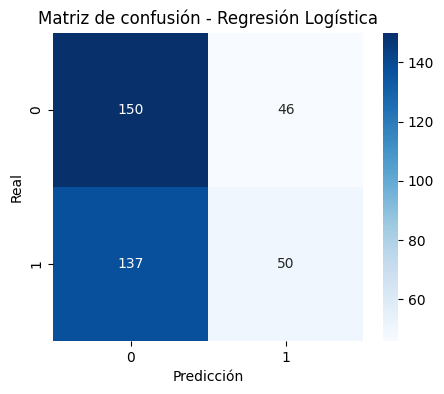


🌲 Resultados - Random Forest
Accuracy: 0.4439
              precision    recall  f1-score   support

         0.0       0.46      0.54      0.50       196
         1.0       0.42      0.34      0.38       187

    accuracy                           0.44       383
   macro avg       0.44      0.44      0.44       383
weighted avg       0.44      0.44      0.44       383



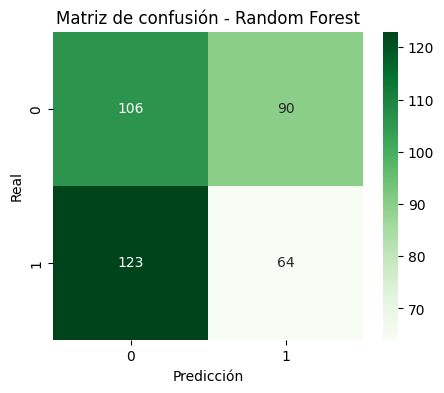

In [363]:
# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se crea una copia del df pero sin valores nulos
df_without_nulls = df.dropna()

# Se separa la variable objetivo
X = df_without_nulls.drop('DEATH_EVENT', axis=1)
y = df_without_nulls['DEATH_EVENT']

# Se divide las variables de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Se escalan las variables (Solo para regresion logistica)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 🔹 REGRESIÓN LOGÍSTICA
# ==========================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("📊 Resultados - Regresión Logística")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ==========================
# 🌲 RANDOM FOREST
# ==========================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Resultados - Random Forest")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [364]:
# Preparar datos
X = df[[col for col in df.columns if col != 'DEATH_EVENT']]
y = df['DEATH_EVENT']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar shapes antes del entrenamiento
print("\nFormas de los conjuntos de datos:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Formas de los conjuntos de datos:
X_train shape: (2133, 12)
X_test shape: (534, 12)
y_train shape: (2133,)
y_test shape: (534,)


## Pipeline para transformación de datos

### Se crean dos pipelines para las columnas numéricas con el fin de comparar el efecto que tiene en los modelos, e identificar en cual escenario, los modelos se desempeñan mejor

In [365]:

# 2. Definir los features y transformadores
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                   'platelets', 'serum_creatinine', 'serum_sodium', 'time']

boolean_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Pipeline para features numéricas con verificación
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Pipeline para features numéricas con verificación
numeric_transformer_scaler = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Pipeline para features booleanas con verificación
boolean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(drop='if_binary')) 
])

# Combinar transformadores
preprocessor_median = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)


# Combinar transformadores
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_scaler, numeric_features),
        ('bool', boolean_transformer, boolean_features)
    ],
    verbose=True 
)

display(preprocessor_median)
display(preprocessor_scaled)

,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,True
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,True
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2531 non-null   Int64  
 1   anaemia                   2667 non-null   boolean
 2   creatinine_phosphokinase  2481 non-null   Int64  
 3   diabetes                  2667 non-null   boolean
 4   ejection_fraction         2571 non-null   float64
 5   high_blood_pressure       2667 non-null   boolean
 6   platelets                 2383 non-null   float64
 7   serum_creatinine          2516 non-null   float64
 8   serum_sodium              2667 non-null   float64
 9   sex                       2667 non-null   boolean
 10  smoking                   2667 non-null   boolean
 11  time                      2667 non-null   int64  
 12  DEATH_EVENT               2667 non-null   boolean
dtypes: Int64(2), boolean(6), float64(4), int64(1)
memory usage: 203.2 KB

In [373]:
def resumen_clasificación(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    return {"exactitud": acc,
            "precision": prec,
            "recall": recall,
            "f1": f1,
            "roc": roc}

In [375]:

# Definir los modelos a probar

modelos = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

print(modelos)
print("----")
print(type(modelos))


# Crear pipelines completos para cada combinación de modelo y preprocesador
pipelines = {} #Nótese que es un diccionario

for modelo_nombre, modelo in modelos.items():
    # Pipeline con imputación mediana (sin escalado)
    pipelines[f"{modelo_nombre}_median"] = Pipeline([
        ("preprocessing", preprocessor_median),
        ("classifier", modelo)
    ])
    # Pipeline con imputación con media + escalado
    pipelines[f"{modelo_nombre}_scale"] = Pipeline([
        ("preprocessing", preprocessor_scaled),
        ("classifier", modelo)
    ])

display(pipelines)

# Entrenar y evaluar cada pipeline
resultados = {}

for nombre_pipeline, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    resultados[nombre_pipeline] = resumen_clasificación(y_test, y_pred)


{'RandomForest': RandomForestClassifier(random_state=42), 'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)}
----
<class 'dict'>


{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [376]:
# 1. Convertir el diccionario 'resultados' en un DataFrame
df_resultados = pd.DataFrame(resultados).T

# 2. Ordenar por la columna 'exactitud' de manera descendente
df_resultados_sorted = df_resultados.sort_values(by="exactitud", ascending=False)

# 3. Visualizar el DataFrame resultante
df_resultados_sorted

,exactitud,precision,recall,f1,roc
RandomForest_scale,0.483146,0.449612,0.464,0.456693,0.482000
LogisticRegression_median,0.481273,0.438356,0.384,0.409382,0.475451
LogisticRegression_scale,0.479401,0.437500,0.392,0.413502,0.474169
RandomForest_median,0.477528,0.443580,0.456,0.449704,0.476239


In [ ]:
# DataFrame para guardar los resultados de cada fold
df_cv_results = pd.DataFrame(columns=["pipeline", "fold", "accuracy"])

# Número de folds
cv_folds = 5

pipelines

{'RandomForest_median': Pipeline(steps=[('preprocessing',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median'))]),
                                                   ['age',
                                                    'creatinine_phosphokinase',
                                                    'ejection_fraction',
                                                    'platelets',
                                                    'serum_creatinine',
                                                    'serum_sodium', 'time']),
                                                  ('bool',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                         

In [378]:
for pipeline_name, pipeline_obj in pipelines.items():
    # cross_val_score entrena y evalúa en 5 folds, devolviendo un array con 5 valores de accuracy
    scores = cross_val_score(pipeline_obj, X_train, y_train, cv=cv_folds, scoring="accuracy")

    # Crear un DataFrame temporal con la información de cada fold
    temp_df = pd.DataFrame({
        "pipeline": [pipeline_name]*cv_folds,
        "fold": list(range(1, cv_folds+1)),
        "accuracy": scores
    })

    # Concatenar al DataFrame global
    df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


C:\Users\c_cam\AppData\Local\Temp\ipykernel_12800\2089431394.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_cv_results = pd.concat([df_cv_results, temp_df], ignore_index=True)


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[Colum

c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s


In [379]:
# Observa los resultados
df_cv_results.head(20)

,pipeline,fold,accuracy
0,RandomForest_median,1,0.477752
1,RandomForest_median,2,0.484778
2,RandomForest_median,3,0.461358
3,RandomForest_median,4,0.502347
4,RandomForest_median,5,0.509390
5,RandomForest_scale,1,0.473068
6,RandomForest_scale,2,0.494145
7,RandomForest_scale,3,0.466042
8,RandomForest_scale,4,0.492958
9,RandomForest_scale,5,0.514085


### Después de la revisión se encuentra que en general, la regresión logistica da un resultado similar, pero el modelo con la imputación por mediana tiene un resultado un poco mejor

In [ ]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", RandomForestClassifier(random_state=42))
])
# Definimos el grid de hiperparámetros a explorar
param_grid = {
    "classifier__n_estimators": [50, 100, 200],    # Número de árboles
    "classifier__max_depth": [None, 5, 10],          # Profundidad máxima del árbol (None para sin límite)
    "classifier__min_samples_split": [2, 5, 10]      # Número mínimo de muestras para dividir un nodo
}
# Configuramos GridSearchCV para evaluar con 5 folds y usando la métrica "accuracy"
grid_search = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1  # Utiliza todos los cores disponibles
)
# Ejecutamos el grid search usando los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor accuracy obtenido en validación cruzada
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

In [389]:
# Creamos el pipeline que integra el preprocesador (preprocessor_median) y el clasificador
pipeline_rf_median = Pipeline([
    ("preprocessing", preprocessor_median),
    ("classifier", LogisticRegression(random_state=42))
])

# Definimos el grid de hiperparámetros a explorar
param_grid = {
    "classifier__penalty": ["l2", "none"],  # l1 y elasticnet solo funcionan con solver='saga'
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
    "classifier__solver": ["lbfgs", "newton-cg", "sag"],  # Algoritmos de optimización
    "classifier__max_iter": [1000, 2500, 5000]  # Número máximo de iteraciones
}

# Configuramos GridSearchCV
grid_search = GridSearchCV(
    pipeline_rf_median,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,  # Utiliza todos los cores disponibles
    verbose=1
)

# Ejecutamos el grid search
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor accuracy
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy (CV):", grid_search.best_score_)

# Opcional: mostrar todos los resultados ordenados
resultados_df = pd.DataFrame(grid_search.cv_results_)
resultados_df = resultados_df.sort_values("mean_test_score", ascending=False)
display(resultados_df[["params", "mean_test_score", "std_test_score"]].head())

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\c_cam\Downloads\ProyectoCienciaDatos\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\c_cam\Downloads\P

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .......... (2 of 2) Processing bool, total=   0.0s
Mejores parámetros: {'classifier__C': 1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor accuracy (CV): 0.5100680586249738


,params,mean_test_score,std_test_score
54,"{'classifier__C': 1, 'classifier__max_iter': 1...",0.510068,0.019621
24,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.509603,0.020472
30,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.509603,0.020472
18,"{'classifier__C': 0.01, 'classifier__max_iter'...",0.509603,0.020472
48,"{'classifier__C': 0.1, 'classifier__max_iter':...",0.509600,0.018934


# Guardar los modelos

In [392]:
import joblib
from pathlib import Path

DATA_DIR = Path.cwd() #/ "Modelos"

# Suponiendo que 'grid_search' es el objeto de GridSearchCV que usamos para el fine-tuning
best_model = grid_search.best_estimator_

# Imprimir el mejor modelo
print("El mejor modelo es:")
print(best_model)

# Guardar el modelo usando joblib con el nombre especificado
joblib.dump(best_model, DATA_DIR / "heart_failure_clinical_records-logistic_regression-v1.joblib")

print("Modelo guardado como 'heart_failure_clinical_records-logistic_regression-v1.joblib'")

El mejor modelo es:
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                         